# Ease Of Movement Indicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volume import EaseOfMovementIndicator

In [27]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

Choose eom_sma_50

In [28]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "eom_"
    for w in windows:
        eom = EaseOfMovementIndicator(df.high, df.low, df.volume, window=w)
#         df[name + str(w)] = eom.ease_of_movement()
        df[name + "sma_" + str(w)] = eom.sma_ease_of_movement()

In [29]:
variations([20, 30, 40, 50, 60, 70])

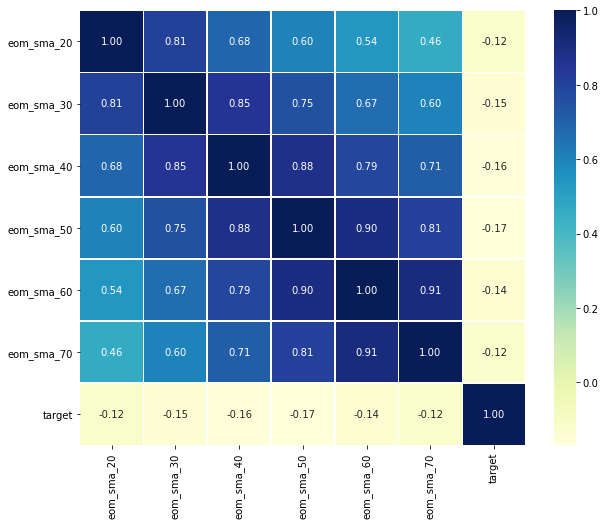

In [30]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

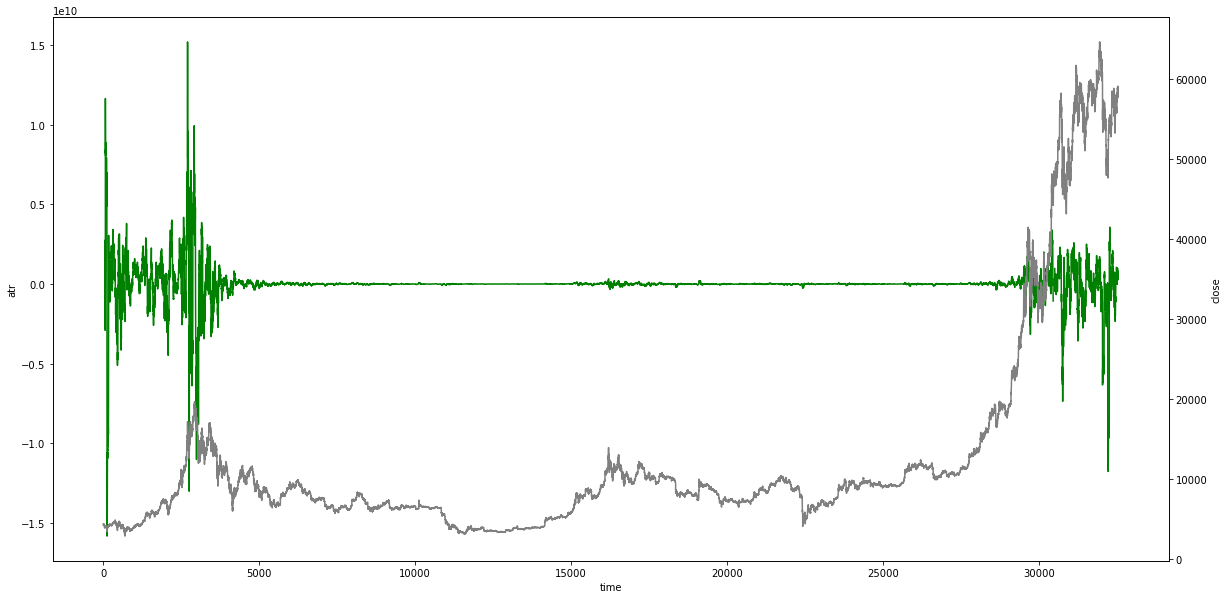

In [32]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.eom_sma_50,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Try balancing

In [50]:
df["eom_amplified"] = list(map(lambda x: uf.log_abs(x*10), df.eom_sma_50))
df["eom_amplified_rate"] = uf.get_rate(uf.get_moving_average(df.eom_amplified, 200))

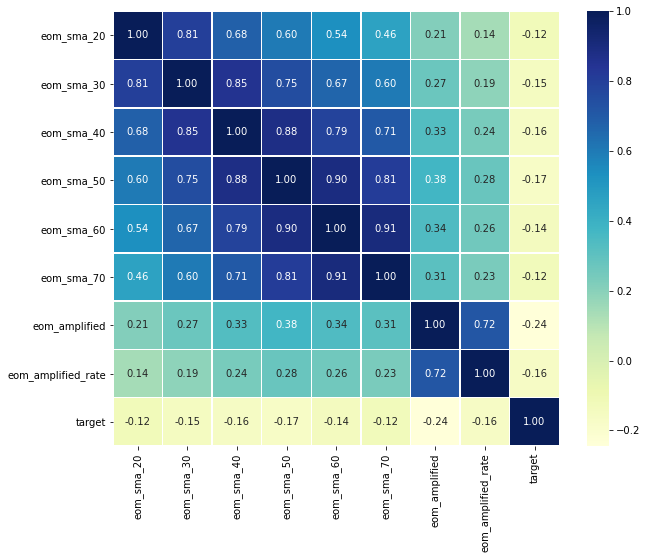

In [51]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

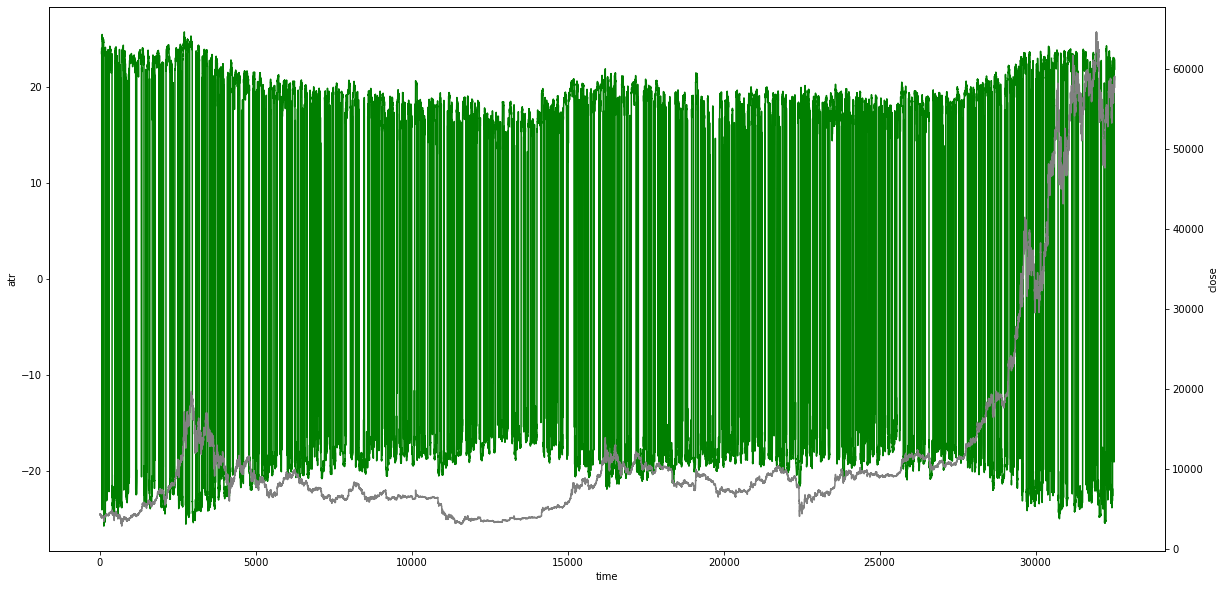

In [52]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.eom_amplified,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

# Conclusion: eom amplified